In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function, absolute_import, division

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from GomokuBoard import GomokuBoard
from Heuristics import Heuristics
from GomokuTools import GomokuTools as gt
from HeuristicPolicy import HeuristicGomokuPolicy

In [4]:
from google.cloud import bigquery
import google.datalab.bigquery as bq

In [5]:
A,B,C,D,E,F,G,H,I, J, K, L, M, N, O, P, Q, R, S, T, U = \
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
BLACK, WHITE, EDGES = 0,1,2

In [6]:
from GomokuData import data_from_game

In [7]:
heuristics = Heuristics(kappa=3.0)

In [8]:
def get_train_data_function(heuristics, N):
   
    def _floats_feature(value):
        return tf.train.Feature(float_list=tf.train.FloatList(value=value))

    def _create_train_data(recording):
        strrep =  recording['game']
        stones = gt.string_to_stones(strrep)
        print(strrep)
        print(stones)
        board = GomokuBoard(heuristics, N, disp_width=8, stones=stones)
        policy = HeuristicGomokuPolicy(board, 2)
        return data_from_game(board, policy, heuristics)

    return _create_train_data

In [9]:
data_function = get_train_data_function(heuristics, 20)

In [10]:
data_function({'game': 'h13h15d15c16k12d17i12e18f19f17g16e17g17c17b17e16e15c18f15c15c14c19'})

h13h15d15c16k12d17i12e18f19f17g16e17g17c17b17e16e15c18f15c15c14c19
[('H', 13), ('H', 15), ('D', 15), ('C', 16), ('K', 12), ('D', 17), ('I', 12), ('E', 18), ('F', 19), ('F', 17), ('G', 16), ('E', 17), ('G', 17), ('C', 17), ('B', 17), ('E', 16), ('E', 15), ('C', 18), ('F', 15), ('C', 15), ('C', 14), ('C', 19)]
[(8, 13), (8, 15), (4, 15), (3, 16), (11, 12), (4, 17), (9, 12), (5, 18), (6, 19), (6, 17), (7, 16), (5, 17), (7, 17), (3, 17), (2, 17), (5, 16), (5, 15), (3, 18), (6, 15), (3, 15)]
[ 3 15]


ValueError: Not a valid move: (0, 0). Beyond board boundary.

In [11]:
stones = [(8, 13), (8, 15), (4, 15), (3, 16), (11, 12), (4, 17), (9, 12), (5, 18), 
          (6, 19), (6, 17), (7, 16), (5, 17), (7, 17), (3, 17), (2, 17), (5, 16), 
          (5, 15), (3, 18), (6, 15), (3, 15)]

In [18]:
board = GomokuBoard(heuristics=Heuristics(kappa=3), N=20, stones=stones, disp_width=10)

In [19]:
policy = HeuristicGomokuPolicy(board, 2)

In [20]:
from QFunction import heuristic_QF

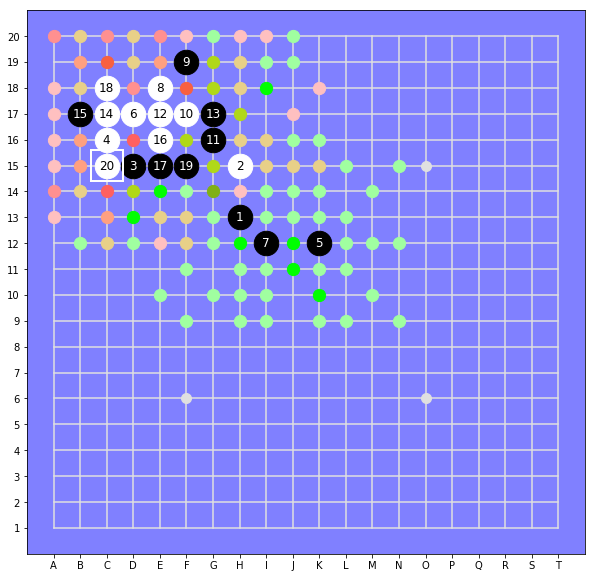

In [27]:
board.display('current')

In [32]:
stones = [(8, 13), (8, 15), (4, 15), (3, 16), (11, 12), (4, 17), (9, 12), (5, 18), 
          (6, 19), (6, 17), (7, 16), (5, 17), (7, 17), (3, 17), (2, 17), (5, 16), 
          (5, 15), (3, 18), (6, 15), (3, 15)]
board = GomokuBoard(heuristics, 20, disp_width=8, stones=stones)
policy = HeuristicGomokuPolicy(board, 2)
data_from_game(board, policy, heuristics)

(array([[[[0, 1],
          [0, 1],
          [0, 1],
          ...,
          [0, 1],
          [0, 1],
          [0, 1]],
 
         [[0, 1],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 1]],
 
         [[0, 1],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 1]],
 
         ...,
 
         [[0, 1],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 1]],
 
         [[0, 1],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 1]],
 
         [[0, 1],
          [0, 1],
          [0, 1],
          ...,
          [0, 1],
          [0, 1],
          [0, 1]]],
 
 
        [[[0, 1],
          [0, 1],
          [0, 1],
          ...,
          [0, 1],
          [0, 1],
          [0, 1]],
 
         [[0, 1],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0